# Google Small ASR

In [1]:
## Notebook settings
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
import sys
sys.path.append("..")
from audio import *

In [7]:
data_folder = Path('/home/h/.fastai/data/google-asr-small'); data_folder

PosixPath('/home/h/.fastai/data/google-asr-small')

In [9]:
audios = (AudioList.from_folder(data_folder, recurse=True)); audios

AudioList (0 items)

Path: /home/h/.fastai/data/google-asr-small

In [150]:
label_data = audios.split_by_rand_pct(0.2, seed=2).label_from_folder()
label_data.train.x.tfm_args = tfm_params
label_data.valid.x.tfm_args = tfm_params
label_data

LabelLists;

Train: LabelList (2093 items)
x: AudioList
AudioItem: 1.2sec (19200 @ 16000hz).,AudioItem: 1.2sec (19200 @ 16000hz).,AudioItem: 1.2sec (19200 @ 16000hz).,AudioItem: 1.2sec (19200 @ 16000hz).,AudioItem: 1.2sec (19200 @ 16000hz).
y: CategoryList
bed,bed,bed,bed,bed
Path: /home/h/.fastai/data/google-asr-small;

Valid: LabelList (523 items)
x: AudioList
AudioItem: 1.2sec (19200 @ 16000hz).,AudioItem: 1.2sec (19200 @ 16000hz).,AudioItem: 1.2sec (19200 @ 16000hz).,AudioItem: 1.2sec (19200 @ 16000hz).,AudioItem: 1.2sec (19200 @ 16000hz).
y: CategoryList
one,off,on,down,off
Path: /home/h/.fastai/data/google-asr-small;

Test: None

torch.Size([1, 224, 267])


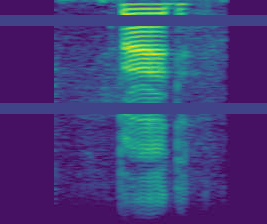

In [154]:
bs = 128
tfm_sg_shift.use_on_y = False
tfm_sg_aug.use_on_y = False
tfms = [tfm_sg_aug], []
db = label_data.transform(tfms).databunch(bs=bs)
print(db.train_ds[1][0].shape)
db.train_ds[20][0].show()

In [155]:
learn = audio_learner(db)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


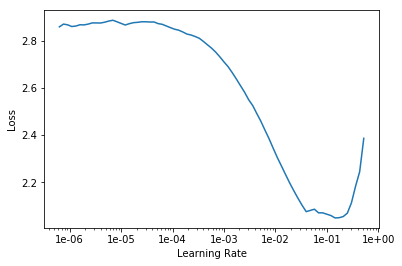

In [156]:
learn.lr_find()
learn.recorder.plot()

In [157]:
sharp = slice(1e-3, 1e-2)
base = slice(1e-4, 4e-3)
wide = slice(3e-4, 1e-2)
learn.fit_one_cycle(20, sharp)

epoch,train_loss,valid_loss,accuracy,time
0,2.579870,2.457310,0.101338,00:04
1,2.023831,2.530479,0.210325,00:04
2,1.439896,2.689427,0.326960,00:04
3,1.062681,0.707382,0.793499,00:04
4,0.806942,0.493500,0.837476,00:04
5,0.651600,2.201286,0.636711,00:04
6,0.536320,0.728474,0.799235,00:04
7,0.446155,0.526748,0.868069,00:04
8,0.367041,0.376579,0.885277,00:04
9,0.300504,0.300115,0.915870,00:04


[('tree', 'three', 2),
 ('bird', 'bed', 1),
 ('dog', 'off', 1),
 ('no', 'down', 1),
 ('on', 'bird', 1),
 ('on', 'dog', 1),
 ('on', 'down', 1),
 ('one', 'on', 1),
 ('three', 'bird', 1),
 ('three', 'tree', 1)]

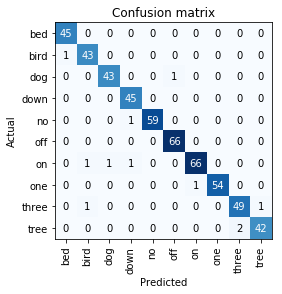

In [158]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.most_confused()